# Acquire Data, Preprocess and plot - without thunder

### Import libraries

In [1]:
from libtiff import TIFF
import numpy as np
import os
import PIL.Image as pil
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Stimulsu on and off time
stimulus_on_time = [46, 86, 126, 166, 206, 246]
stimulus_off_time = [66, 106, 146, 186, 226, 266]
from Plotting_Functions import FormatForPlotting
Format_to_plot = FormatForPlotting(stimulus_on_time, stimulus_off_time)
heatmapplotting = Format_to_plot.heatmapplotting
linegraphplotting = Format_to_plot.linegraphplotting

In [2]:
#Import Thunder libraries
from thunder import Colorize
image = Colorize.image

In [3]:
#Matplotlib plots to be inline in the notebook
%matplotlib inline

### Define fucntions

In [ ]:
# Plot planes in the given image as subplot
def PlotImagePlanes(img):
    print 'Image Size = ' + str(np.shape(data_raw))
    numz = np.size(img,2)
    num_subplots = int((math.ceil(numz / 2.) * 2)/2)
    fig1 = plt.figure(figsize=(15,10))
    for ii in xrange(0, numz):    
        ax1 = fig1.add_subplot(num_subplots,2,ii+1)
        ax1 = image(np.mean(img[:,:,ii,:],2))    
        plt.title('Plane: ' + str(ii+1), fontsize=12, color='white')
    plt.show()

In [ ]:
# Plot heatmaps
def plot_heatmaps_plane(ax1, to_plot, **kwargs):
    
    plot_vertical_lines_onset(stimulus_on_time)
    plot_vertical_lines_offset(stimulus_off_time)
    return im

## 1. User input

In [6]:
# Provide Folder from which to get data
foldername = '/Users/seetha/Desktop/Parapineal_Ablation/Data/01_Zoom=2/Tiff/Sorted/Red_First/Fish1159/Block2/'

# Image sizes
img_size_x = 216
img_size_y = 432
img_size_crop_x1 = 20
img_size_crop_x2 = 20
img_size_crop_y1 = 40
img_size_crop_y2 = 40

# Background subtraction ROI
bg_roi = 0



## 2. Get tiff files from folder

In [7]:
# Get names of all tiff files in the directory
onlyfiles = [f for f in os.listdir(foldername) 
             if (os.path.isfile(os.path.join(foldername, f)) 
                 and f.find('.tif') > 0 and f.find('T=') >= 0)]

for lst in xrange(1, np.size(onlyfiles, axis=0) + 1):
    tif1 = TIFF.open(foldername + 'T=' + str(lst) + '.tif', mode='r')
    
    if lst == 1:
        count_z = 0
        for tif_image in tif1.iter_images():
            count_z = count_z + 1

        data_raw = np.zeros((img_size_x, img_size_y, count_z, np.size(onlyfiles, 0)), dtype=np.uint8)
    data_raw = get_tif_images_raw(data_raw, lst, onlyfiles, tif1, 
                                  img_size_x, img_size_y, img_size_crop_x1, img_size_crop_x2, img_size_crop_y1,
                                  img_size_crop_y2, bg_roi)

Cropping x and y pixels..


### Plot planes

In [ ]:
PlotImagePlanes(data_raw)

## 3. Plot heatmaps for each plane

In [8]:
img = np.asarray(data_raw[:,:,1,:])
img_reshape = np.reshape(img, (np.size(img,0)*np.size(img,1), np.size(img, 2)))
img_sort = np.argsort(np.mean(img_reshape, axis=1))
img_sort = img_reshape[img_sort, :][-5000:, :]

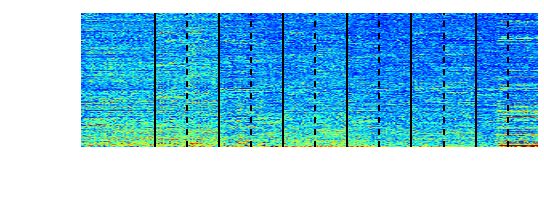

In [9]:
fs = plt.figure(figsize=(10, 5))
gs = plt.GridSpec(4, 2, width_ratios=[9, 1])
ax1 = fs.add_subplot(gs[:2, :1])
im = plt.imshow(img_sort, aspect='auto', cmap='jet')  
heatmapplotting(ax1, num_bins=4)

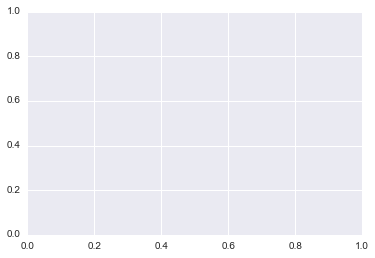

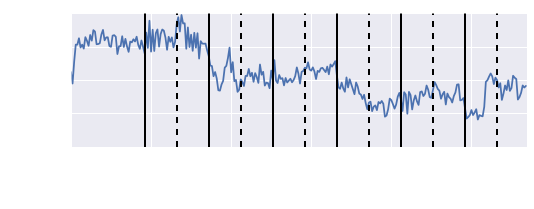

In [10]:
ax2 = fs.add_subplot(gs[:2, 1:])
color_bar = plt.colorbar(im, cax=ax2)
cbytick_obj = plt.getp(color_bar.ax.axes, 'yticklabels')  
plt.setp(cbytick_obj, color='w')
    
fs = plt.figure(figsize=(10, 5))
gs = plt.GridSpec(4, 2, width_ratios=[9, 1])
ax2 = fs.add_subplot(gs[:2, :1])
ax2.plot(np.mean(img_sort,axis=0))
linegraphplotting(ax2, xlim_input=(0, np.size(img_sort, 1)), num_bins=4)
plt.show()

In [ ]:
img_reshape = np.reshape